In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\UdemyExerciseML\\Machine Learning A-Z (Codes and Datasets)\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)\\Python\\Position_Salaries.csv")

In [5]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [8]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [9]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [10]:
# turn y into a 2d array
y = y.reshape(len(y), 1)

In [11]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [12]:
# standard scaler needs 2d array
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [13]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [14]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [15]:
from sklearn.svm import SVR
svr_reg = SVR(kernel="rbf")
svr_reg.fit(X, y) 

SVR()

In [24]:
print(sc_y.inverse_transform(svr_reg.predict(sc_X.transform([[6.5]]))))

[170370.0204065]


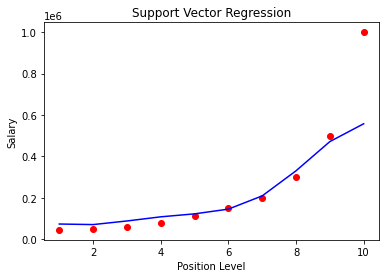

In [26]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(svr_reg.predict(X)), color="blue")
plt.title("Support Vector Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()